# **Healthcare_Linear _Regression_ML-PROJECT1**

In [ ]:
# For This Linear_regression PRoject we required Below libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For Building Linear_Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# For VIF
# !pip install statsmodels #installing Package   #conda install library_nmae then run this cell
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# For MSE & MAE &  R2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# For normalization & Standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# To avoid Warnings During programm execution
import warnings
warnings.filterwarnings("ignore")

# **`1) Problem Statement`**

### **>> Aim is to predict charges based on following features/independent variables = "age", "sex", "bmi", "children", "smoker", "region"**

# **`2) Data Gathering`**

In [69]:
df = pd.read_csv("medical_insurance.csv")      # read_csv is a function in Pandas used to read csv files
df.head()     # head() function in Pandas return 1st five rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
df.shape  #shape is a property of pandas that return (Total no.of Rows , columns) in Dataset

(1338, 7)

# **`3) Exploratory Data Analysis (EDA ) OR DQ check(Data Quality)`**

#### Columns-wise Analysis

In [71]:
df.columns  #columns is property in pandas that returns "Name of columns in Dataset"

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
df["sex"].unique()  #Check unique values in "sex" column

array(['female', 'male'], dtype=object)

In [73]:
df["sex"].value_counts()  # value_counts return how many count of Categorical values distributed in all rows in dataset.

sex
male      676
female    662
Name: count, dtype: int64

In [74]:
df["sex"].value_counts().to_dict() #.to_dict() function converts above format in dictionery format

{'male': 676, 'female': 662}

In [75]:
df["children"].unique()   #Check unique values in "children" column

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [76]:
df["smoker"].unique()     #Check unique values in "smoker" column

array(['yes', 'no'], dtype=object)

In [77]:
df["smoker"].value_counts().to_dict() #Thre are 1064 people are "Non-Smokers" & 274 people are "Smokers" in dataset

{'no': 1064, 'yes': 274}

In [78]:
df.region.unique()  # Another way :- "df.region.unique()"" ,We can use this, if column name doesn't include spaces in it..

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [79]:
df.region.value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

#### To know Datatype of all columns ->

In [80]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [81]:
df.shape

(1338, 7)

In [82]:
df.duplicated().sum() #check duplicates in df

1

#### To know peroperties of Dataset ->

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
type(df)  # to know type of dataframe

pandas.core.frame.DataFrame

#### Check missing values in dataset ->

In [85]:
df.isna().sum()   # df.isna().sum() OR df.isnull().sum() function used to check missing values count...

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [86]:
pd.DataFrame({"Missing Values":df.isnull().sum(),"Missing values Mean%":df.isna().mean()})

,Missing Values,Missing values Mean%
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


## **Data Visualization**

#### To understand relations/patterns in dataset between Multiple independent variables (x1,x2..) & dependent variables(Y)->

In [87]:
df1 = df.copy() # so Original df stays as it is & we copy original df to df1 variable

In [88]:
import seaborn as sns   #import seaborn library 

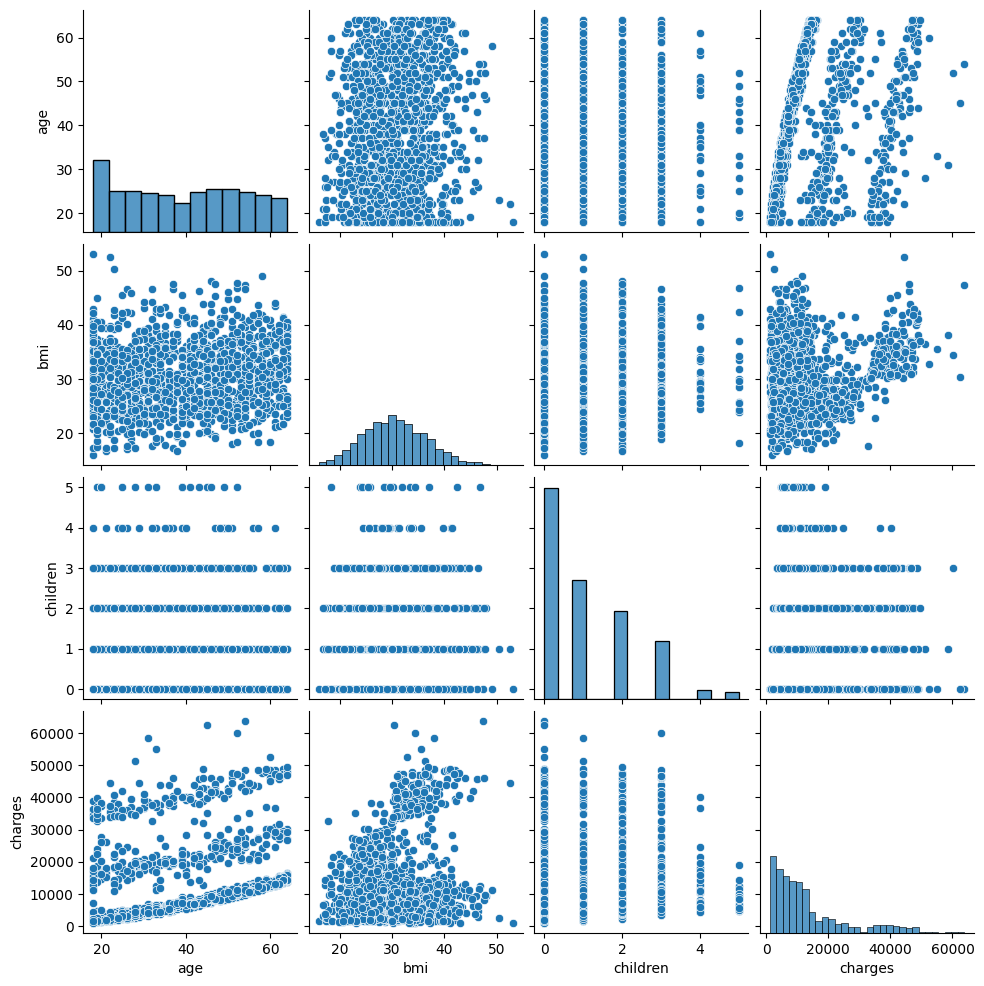

In [89]:
sns.pairplot(df1)

<Axes: xlabel='age', ylabel='charges'>

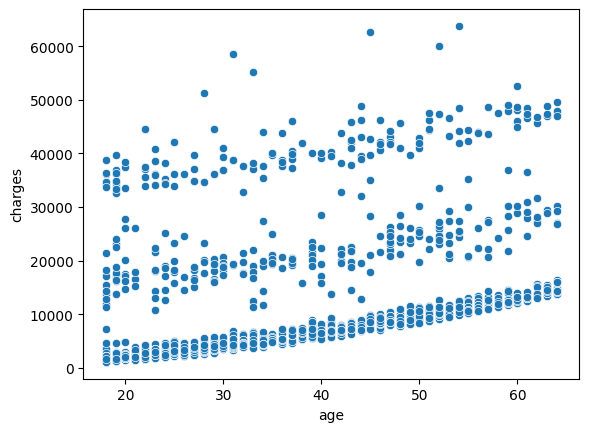

In [90]:
sns.scatterplot(data=df,x="age",y="charges")

<Axes: xlabel='age', ylabel='charges'>

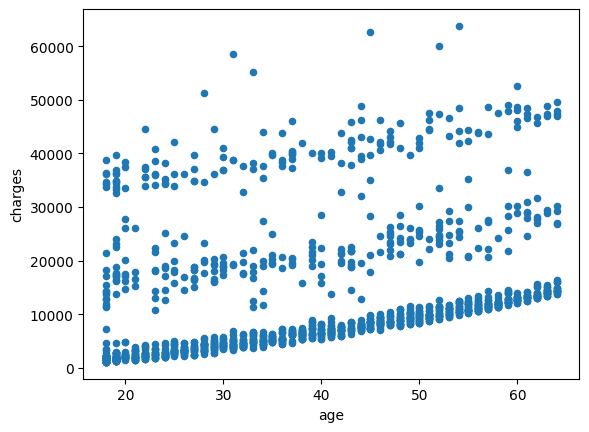

In [91]:
#OR
df.plot(x="age",y="charges",kind="scatter")  # kind means :type of plot(bar/histogram/boxplot/scatter)

<Axes: xlabel='smoker', ylabel='region'>

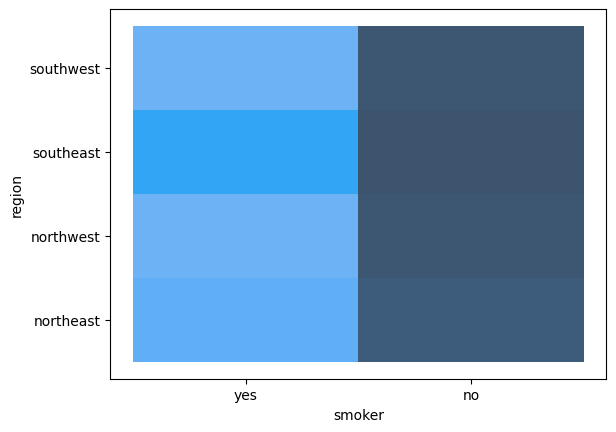

In [92]:
sns.histplot(data=df1,x="smoker",y="region")  #for categorical values use histplot

# **`4. Feature Engineering`**

### **1) Drop unnecessary columns..**

In [93]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [94]:
df1.drop('sex',axis=1,inplace=True)

### **2) Replacing Categorical values to Numrerical Values**-->>

In [95]:
df1.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [96]:
df1.head(2)  #"sex" column in df1 , i will drop now

,age,bmi,children,smoker,region,charges
0,19,27.90,0,yes,southwest,16884.9240
1,18,33.77,1,no,southeast,1725.5523


#### Now, replace categorical values to Numerical(int,float) values for Machines Understanding Language ->>

In [97]:
df1.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [98]:
## "age" & "bmi" & "children" &"charges" are already in Numerical values
## Here, "smoker" & "region" are categorical values that we have to convert in Numerical values

In [99]:
df1["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [100]:
df1["smoker"] = df1["smoker"].replace({"yes":1 , "no":0})  # I replace "yes" with 1 & "no" with 0

In [101]:
df1["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [102]:
df1["region"] = df1["region"].replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})  #replacing 

In [103]:
df1.head()  #Now, all columns are in Numerical values (int/float)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,1,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,3,21984.47061
4,32,28.880,0,0,3,3866.85520


# **`5. Feature Selection`**

## **Assumptions Of Linear Regression**
### **1) Linearity :- To know relationship between Independent Variable(x1,x2,x3) & Dependent Variable(Y)**

In [104]:
df1.corr()

,age,bmi,children,smoker,region,charges
age,1.000000,0.109272,0.042469,-0.025019,-0.002127,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.198341,0.067998,0.787251,0.006208,1.000000


#### R_value range is -1 to +1
- if R_value > +0.7 ->>>Strong +ve relation
- if R_value < -0.7 ->>>Strong -ve relation
- if R_value = 0 ->>> No relation

<Axes: >

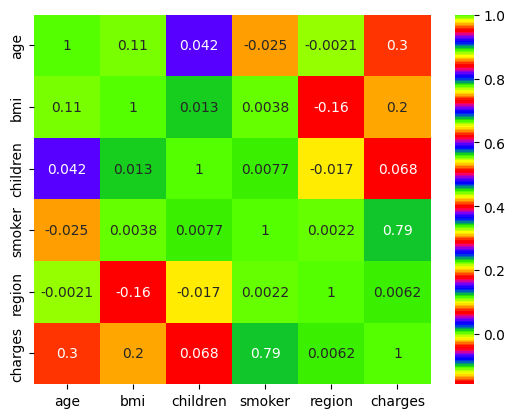

In [105]:
sns.heatmap(df1.corr(),annot=True,cmap='prism')

### Checking Multicollinearity between Independent variable(x1,x2,x3) by VIF (variance inflation factor)

In [106]:
df1.head(1)

,age,bmi,children,smoker,region,charges
0,19,27.9,0,1,1,16884.924


In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def VIF(x_data):
    data_with_constant = add_constant(x_data)
    get_vif = pd.DataFrame()
    get_vif['Variables'] = data_with_constant.columns
    get_vif["Vif_Values"] = [variance_inflation_factor (data_with_constant.values,i) for i in range(data_with_constant.shape[1])]
    print("VIF Values are: ")
    return get_vif

In [108]:
VIF(df1)

VIF Values are: 


,Variables,Vif_Values
0,const,46.414930
1,age,1.372516
2,bmi,1.150322
3,children,1.011287
4,smoker,3.527499
5,region,1.030128
6,charges,4.011362


# **`6. Model Training`**

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [110]:
x = df1.drop('charges',axis=1)
y = df1['charges']

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [112]:
lr_model = LinearRegression()  #this will intialise empty Model
lr_model.fit(x_train,y_train)  #fit trainning data of x&y

LinearRegression()

- For example, predicting a house's price might depend on features like the number of bedrooms, square footage, location, and age of the property. Similarly, in health, predicting insurance costs might depend on age, BMI, smoking status, etc.

# **`7. Model Evaluation`**

In [113]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### On testing Data

In [114]:
x_train.shape,y_train.shape

((1070, 5), (1070,))

In [115]:
x_test.shape,y_test.shape

((268, 5), (268,))

In [116]:
y_pred = lr_model.predict(x_test)  # y_test is our Actual values so give x_test

MSE = mean_squared_error(y_test,y_pred)  #y_test is Actual Value & y_pred is predicted value.....error
print("Mean Squared Error is=", MSE)

#rmse tranform error back to original Unit as per Target Column(Observe Target column in Thousand range so converts as per Target column Range )
rmse = np.sqrt(MSE)
print("Root Mean Square Error is= ",rmse)

R2_SCORE = r2_score(y_test,y_pred)
print("R2_score is= ",R2_SCORE)  ## R2_SCORE Coefficient of Determination (R2_SCORE range is 0 to 1)

                                                            ### N =testning rows..x_test.shape[0] & P=x-test columns
Adjusted_R2_score = 1- (((1-R2_SCORE)*(x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R2 score ",Adjusted_R2_score)
### Adjusted_R2_score formula= 1- (((1-R2)*(N-1)) / (N-P-1))

Mean Squared Error is= 33640657.13645164
Root Mean Square Error is=  5800.056649417455
R2_score is=  0.7833112270019789
Adjusted R2 score  0.7791759450745357


### R² Score Ranges
- 0.0 to 0.2: The model has poor performance, explaining very little of the variance in the target variable.
- 0.2 to 0.4: The model shows fair performance, capturing some variance but with considerable room for improvement.
- 0.4 to 0.6: The model demonstrates moderate performance, explaining a decent amount of variance in the target variable.
- 0.6 to 0.8: The model exhibits good performance, explaining a significant portion of the variance effectively.
- 0.8 to 1.0: The model achieves excellent performance, explaining most of the variance in the target variable.

### Adjusted R² Score Ranges
- Low Adjusted R² (< 0.3): The model has poor explanatory power, potentially due to unnecessary predictors or missing relevantfeatures.
- Moderate Adjusted R² (0.3 to 0.6): The model captures some variance but may benefit from improved feature selection or engineering.
- High Adjusted R² (0.6 to 0.9): The model is well-performing, explaining a significant amount of variance while accounting for the number of predictors.
- Very High Adjusted R² (> 0.9): The model is well-fitted, but caution is needed to ensure it generalizes well and isn’t overfitting.

### Take input from user..>>>>>>>>.for (age,bmi,children,smoker,region)

In [117]:
age = int(input("Enter age: "))
bmi = float(input('Enter BMI: '))
children = int(input("Enter number of children you have: "))
smoker = int(input("Are you a smoker [yes/no]: ").strip().lower().replace('yes', '1').replace('no', '0'))
region = int(input("Enter region [southeast/southwest/northwest/northeast]: ").strip().lower().replace("southeast", "1").replace("southwest", "2").replace("northwest", "3").replace("northeast", "4"))


# Function to get charges based on user input
def get_charges(age, bmi, children, smoker, region):
    # Create DataFrame with user input
    df_ = pd.DataFrame({'age': [age],
                        'bmi': [bmi],
                        'children': [children],
                        'smoker': [smoker],
                        'region': [region]})
    

    return f"Your insurance charges are: {lr_model.predict(df_)[0]}" ##its in list =[5155.49455906251] so we use list[0]=5155.49455906251
get_charges(age, bmi, children, smoker, region)

Enter age:  40
Enter BMI:  19
Enter number of children you have:  2
Are you a smoker [yes/no]:  no
Enter region [southeast/southwest/northwest/northeast]:  southeast


'Your insurance charges are: 4743.004927881126'

# **Model- Save in PICKLE, JSON For testing**------------------------>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [129]:
import pickle
import json

In [120]:
with open('Healthcare(env)_myproject.pkl',"wb") as file:   #"wb": mean write bytes..encoded as 0,1
    pickle.dump(lr_model,file)             #lr-Model as our Linear Regression Model so save in it

In [126]:
Healthcare_json = {"smoker":{"yes":1,"no":0},   #key & dict value pair
                        "region":{'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4},
                        "columns":list(x.columns)}

In [127]:
x.head(1) #✔️

,age,bmi,children,smoker,region
0,19,27.9,0,1,1


## Save JSON file

In [130]:
with open("Healthcare(env)_json.json",'w') as file:
    json.dump(Healthcare_json,file)

# **TESTING ON USER INPUTS FOR LINEAR MODEL** ...........---->

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

## ***Testing on user input***->

In [131]:
import pickle
import json
import numpy as np
import pandas as pd

In [132]:
with open('Healthcare(env)_json.json','r') as file:
    json_data = json.load(file)
json_data

{'smoker': {'yes': 1, 'no': 0},
 'region': {'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4},
 'columns': ['age', 'bmi', 'children', 'smoker', 'region']}

In [133]:
with open('Healthcare(env)_myproject.pkl',"rb") as file:
    lr_model_test = pickle.load(file)

In [134]:
lr_model_test

LinearRegression()

In [138]:
age = 40
bmi = 19
children = 2
column_names = json_data['columns']
smoker = 'no'
region = 'southeast'

smoker_val = json_data['smoker'][smoker]
regio_val = json_data['region'][region]
array = np.zeros(len(columns),dtype = int)
print(array)
print()
array[0] = age
array[1] = bmi
array[2] = children
array[3] = smoker_val
array[4] = regio_val
array

[0 0 0 0 0]



array([40, 19,  2,  0,  1])

### Predict charges based on Model- Save in pickle....

In [141]:
# we passed in Linear Model predict in 2D array..check above it is already 1D array ([]) so pass addon []
predicted_charges = lr_model_test.predict([array])
predicted_charges

array([4743.00492788])

In [143]:
predicted_charges = lr_model_test.predict([array])[0]
predicted_charges

4743.004927881126

In [145]:
predicted_charges = np.around(lr_model_test.predict([array])[0],2)
print("Your Insurance charges are: ",predicted_charges)

Your Insurance charges are:  4743.0


## **To improve performance of Model by PolynomialFeatures....->**

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures #Chatgpt

### Take input from user..>>>>>>>>.for (age,bmi,children,smoker,region)

- **Linear regression might underfit the data (high bias) but generalizes better (low variance).
Polynomial regression might fit the training data very well (low bias) but risks overfitting (high variance).**
- **If polynomial regression significantly improves MSE, RMSE, and R² without overfitting, it could be a better choice.
If the linear model performs almost as well as the polynomial but with simpler relationships, it may be more stable and interpretable.
The best way to decide is by evaluating both models with cross-validation**